In [2]:
N = int(input())
mas =[int(input()) for i in range(N)]
sum = 0
m_sum = mas[0]
reap = []
for i in mas:
  sum+=i 
  reap.append(i)
  if sum<0:
      sum = 0
      reap = []
  if sum > m_sum:
    m_sum = sum
    needed = reap.copy()
  
needed


9
4
4



ValueError: ignored

In [7]:
!pip install torch

In [2]:
import torch
from torch import nn
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset
from torchvision import models
import torch.functional as F
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
 
from torchvision import transforms, utils
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [9]:
device

device(type='cuda', index=0)

In [10]:
!tar -xvf '/content/drive/My Drive/internship_data.tar.gz'
!tar -xvf '/content/drive/My Drive/internship_data.tar.gz'

Выходные данные были обрезаны до нескольких последних строк (5000).
internship_data/female/176541.jpg
internship_data/female/197816.jpg
internship_data/female/021766.jpg
internship_data/female/023116.jpg
internship_data/female/180754.jpg
internship_data/female/049526.jpg
internship_data/female/162901.jpg
internship_data/female/178184.jpg
internship_data/female/000493.jpg
internship_data/female/117257.jpg
internship_data/female/146389.jpg
internship_data/female/097102.jpg
internship_data/female/162119.jpg
internship_data/female/147236.jpg
internship_data/female/123583.jpg
internship_data/female/082756.jpg
internship_data/female/170656.jpg
internship_data/female/098709.jpg
internship_data/female/012255.jpg
internship_data/female/085090.jpg
internship_data/female/069812.jpg
internship_data/female/024874.jpg
internship_data/female/107100.jpg
internship_data/female/153792.jpg
internship_data/female/092234.jpg
internship_data/female/176085.jpg
internship_data/female/079875.jpg
internship_dat

In [11]:
transform_train = transforms.Compose([
         transforms.Resize([150,150]),
         transforms.CenterCrop(150),
         transforms.RandomHorizontalFlip(0.3),
         transforms.ToTensor(),
         transforms.Normalize(mean = [0.5,0.5,0.5],std = [0.5,0.5,0.5])
])

transform_val = transforms.Compose([
         transforms.ToTensor(),
         transforms.Normalize(mean = [0.5,0.5,0.5],std = [0.5,0.5,0.5])

])

In [5]:
# !pip3 install https://download.pytorch.org/whl/cu80/torch-1.0.0-cp36-cp36m-linux_x86_64.whl


In [12]:
import glob, os
os.chdir("/content/internship_data/female")
females_roots = glob.glob('*.jpg')

os.chdir("/content/internship_data/male")
males_roots = glob.glob('*.jpg')

In [13]:
males = ['{root_male}/{male}'.format(root_male = '/content/internship_data/male'
                      ,male = i) for i in males_roots]
females = ['{root_male}/{male}'.format(root_male = '/content/internship_data/female'
                      ,male = i ) for i in females_roots]
male_labels = [0]*len(males)
female_labes = [1]*len(females)
data = pd.DataFrame({'Sex':male_labels+female_labes,'Roots':males+females})
data.head()

,Sex,Roots
0,0,/content/internship_data/male/064462.jpg
1,0,/content/internship_data/male/162890.jpg
2,0,/content/internship_data/male/142185.jpg
3,0,/content/internship_data/male/098974.jpg
4,0,/content/internship_data/male/118181.jpg


In [14]:
train_size = 45000

In [20]:
train_data = data[data['Sex']==0][:train_size].append(data[data['Sex']==1][:train_size])

test_data = data[data['Sex']==0][train_size:].append(data[data['Sex']==1][train_size:])


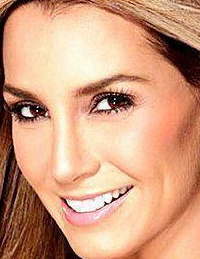

In [19]:
from PIL import Image
Image.open('/content/internship_data/female/000001.jpg')

In [21]:
class FaceDataset(Dataset):
  def __init__(self,df,trans):
    self.trans = trans
    self.df = df
  def __len__(self):
        return self.df.shape[0]
  def __getitem__(self,index):
    img_name = self.df.iloc[index]['Roots']
    image = Image.open(img_name)
    if self.trans:
      image = self.trans(image)
    label = self.df.iloc[index]['Sex']
    return {'label':label,'image':image}
batch_size = 256

train_dataset  = FaceDataset(df = train_data,trans = transform_train)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size,
                        shuffle=True, num_workers=4)

test_dataset  = FaceDataset(df = test_data,trans = transform_train)
test_dataloader = DataLoader(test_dataset, shuffle=True,batch_size=batch_size,
                               num_workers=4)

In [13]:
torch.tensor([55]).to(device)

tensor([55], device='cuda:0')

In [21]:
import torchvision.models as models
resnet = models.resnet50(pretrained=True).to(device)


In [15]:
resnet.fc = nn.Linear(2048,2)

In [22]:
for param in resnet.parameters():
  param.required_grad = False
resnet.fc.requires_grad_ = True
resnet.layer4.requires_grad_ = True

In [23]:
import torch.optim as optim
import numpy as np
 
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(resnet.parameters(), lr=0.001, momentum=0.9)
resnet.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [18]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
from torch.optim

In [26]:
def train(epoch,model,optimizer,scheduler):
  for i in tqdm_notebook(range(epoch)):
    running_loss = 0

    train_dataiter = iter(train_dataloader)
    test_dataiter = iter(test_dataloader)

    data = test_dataiter.next()
    test_labels, test_images = data['label'],data['image']

    batch = train_dataiter.next()
    labels,images = batch['label'],batch['image'].to(device)

    optimizer.zero_grad()
    predict = model(images.to(device)).cpu()
    loss = criterion(predict,labels)
    running_loss += loss.item()
    
    loss.backward()
    optimizer.step()
    scheduler.step()
    accuracy = accuracy_score(np.argmax(predict.detach().numpy() ,1), labels)
    with torch.no_grad():
      predict = model(test_images.to(device)).cpu()
      correct =  accuracy_score(test_labels,np.argmax(predict.detach().numpy() ,1))
    test_acc = (  correct)
    if i%1 ==0:
      print('train_loss: ',round(running_loss,2),'train_acc: ',accuracy,'test_acc: ',test_acc)

      running_loss= 0
scheduler = torch.optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.01)
epoch,model,optimizer = 20,resnet,optimizer
train(epoch,model,optimizer,scheduler) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


train_loss:  0.67 train_acc:  0.87109375 test_acc:  0.890625
train_loss:  0.4 train_acc:  0.8984375 test_acc:  0.89453125
train_loss:  0.26 train_acc:  0.90234375 test_acc:  0.91796875
train_loss:  0.29 train_acc:  0.890625 test_acc:  0.890625
train_loss:  0.32 train_acc:  0.90625 test_acc:  0.87890625
train_loss:  0.25 train_acc:  0.93359375 test_acc:  0.9140625
train_loss:  0.18 train_acc:  0.9296875 test_acc:  0.9296875
train_loss:  0.39 train_acc:  0.890625 test_acc:  0.8984375
train_loss:  0.2 train_acc:  0.9375 test_acc:  0.91015625
train_loss:  0.28 train_acc:  0.90234375 test_acc:  0.92578125
train_loss:  0.2 train_acc:  0.921875 test_acc:  0.90234375
train_loss:  0.27 train_acc:  0.91796875 test_acc:  0.91796875
train_loss:  0.24 train_acc:  0.91796875 test_acc:  0.9375
train_loss:  0.31 train_acc:  0.91796875 test_acc:  0.9375


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

train_loss:  0.2 train_acc:  0.9140625 test_acc:  0.90234375


    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent

train_loss:  0.26 train_acc:  0.90625 test_acc:  0.921875


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
    self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
  File "/usr/lib/python3.6/multiprocessing/process.py", line 1

train_loss:  0.2 train_acc:  0.92578125 test_acc:  0.90234375


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._M

train_loss:  0.2 train_acc:  0.91796875 test_acc:  0.9296875


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._M

train_loss:  0.26 train_acc:  0.9296875 test_acc:  0.9296875


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f87f5b29358>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

train_loss:  0.21 train_acc:  0.921875 test_acc:  0.9375



In [33]:
torch.save(resnet, '/content/drive/My Drive/resner101')

In [23]:
def test_score(model):
  model.eval()
  with torch.no_grad():
          correct = 0
          total = 0
          for data in test_dataloader:
              images, labels = data['image'],data['label']
              outputs = model(images.to(device))
              _, predicted = torch.max(outputs.data, 1)
              total += labels.size(0)
              correct += (predicted == labels.to(device)).sum().item()
  return correct/total
test_score(t)

0.9291141771645671

In [22]:

t = torch.load('/content/drive/My Drive/resner101' )


In [49]:
torch.cuda.empty_cache()
